# Dallas Airbnb Supply and Demand Changes Before and After the Covid19 Pandemic

### Data: 2010-12-29 to 2024-02-22

In [1]:
import pandas as pd
import numpy as np

In [2]:
calendar = pd.read_csv('calendar.csv')
listings = pd.read_csv('listings.csv')
reviews = pd.read_csv('reviews.csv')

## Data Cleaning

### calendar

In [3]:
calendar

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,61878,2024-02-22,f,$75.00,NaN,30,1125
1,61878,2024-02-23,f,$75.00,NaN,30,1125
2,61878,2024-02-24,f,$75.00,NaN,30,1125
3,61878,2024-02-25,f,$75.00,NaN,30,1125
4,61878,2024-02-26,f,$75.00,NaN,30,1125
...,...,...,...,...,...,...,...
1844168,1095999103395944895,2025-02-16,f,$129.00,NaN,2,365
1844169,1095999103395944895,2025-02-17,f,$129.00,NaN,2,365
1844170,1095999103395944895,2025-02-18,f,$129.00,NaN,2,365
1844171,1095999103395944895,2025-02-19,f,$129.00,NaN,2,365


In [4]:
# calendar.describe()

In [5]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1844173 entries, 0 to 1844172
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  float64
 5   minimum_nights  int64  
 6   maximum_nights  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 98.5+ MB


#### Dtype of 'date' should be datetime 

In [6]:
calendar['date_datetime'] = pd.to_datetime(calendar['date'])

#### add columns: Year, Year_Quarter, and Year_Month

In [7]:
calendar['Year'] = calendar['date_datetime'].dt.year

calendar['Year_Quarter'] = calendar['date_datetime'].dt.to_period('Q')
# df['Year_Quarter'] = df['year'].astype(str) + '-Q' + df['quarter'].astype(str) #use this line when using PyGWalker

calendar['Year_Month'] = calendar['date_datetime'].dt.month

In [8]:
calendar.isnull().sum()

listing_id              0
date                    0
available               0
price                   0
adjusted_price    1844173
minimum_nights          0
maximum_nights          0
date_datetime           0
Year                    0
Year_Quarter            0
Year_Month              0
dtype: int64

In [9]:
calendar = calendar.drop('adjusted_price', axis=1)
calendar

,listing_id,date,available,price,minimum_nights,maximum_nights,date_datetime,Year,Year_Quarter,Year_Month
0,61878,2024-02-22,f,$75.00,30,1125,2024-02-22,2024,2024Q1,2
1,61878,2024-02-23,f,$75.00,30,1125,2024-02-23,2024,2024Q1,2
2,61878,2024-02-24,f,$75.00,30,1125,2024-02-24,2024,2024Q1,2
3,61878,2024-02-25,f,$75.00,30,1125,2024-02-25,2024,2024Q1,2
4,61878,2024-02-26,f,$75.00,30,1125,2024-02-26,2024,2024Q1,2
...,...,...,...,...,...,...,...,...,...,...
1844168,1095999103395944895,2025-02-16,f,$129.00,2,365,2025-02-16,2025,2025Q1,2
1844169,1095999103395944895,2025-02-17,f,$129.00,2,365,2025-02-17,2025,2025Q1,2
1844170,1095999103395944895,2025-02-18,f,$129.00,2,365,2025-02-18,2025,2025Q1,2
1844171,1095999103395944895,2025-02-19,f,$129.00,2,365,2025-02-19,2025,2025Q1,2


In [10]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1844173 entries, 0 to 1844172
Data columns (total 10 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            object        
 2   available       object        
 3   price           object        
 4   minimum_nights  int64         
 5   maximum_nights  int64         
 6   date_datetime   datetime64[ns]
 7   Year            int32         
 8   Year_Quarter    period[Q-DEC] 
 9   Year_Month      int32         
dtypes: datetime64[ns](1), int32(2), int64(3), object(3), period[Q-DEC](1)
memory usage: 126.6+ MB


In [11]:
calendar.isnull().sum()

listing_id        0
date              0
available         0
price             0
minimum_nights    0
maximum_nights    0
date_datetime     0
Year              0
Year_Quarter      0
Year_Month        0
dtype: int64

### listings

In [12]:
listings

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,61878,https://www.airbnb.com/rooms/61878,20240222071419,2024-02-22,city scrape,MODERN LIVING AND FURNISHINGS,Close to downtown and Uptown. Fast and conven...,Enjoy the heart of Dallas right out your door ...,https://a0.muscache.com/pictures/c4d9625e-bcc5...,300211,...,4.92,4.75,4.77,NaN,f,1,1,0,0,0.34
1,776810,https://www.airbnb.com/rooms/776810,20240222071419,2024-02-22,city scrape,Goldies Bohemian Loft,NaN,15 min walk to downtown Dallas and American Ai...,https://a0.muscache.com/pictures/9201ddbc-b015...,4096626,...,4.96,5.00,4.78,NaN,f,1,1,0,0,0.21
2,795703,https://www.airbnb.com/rooms/795703,20240222071419,2024-02-22,city scrape,Amazing location walk to Downtown Dallas,***** Over 30% Discounts for stays over 30 day...,Located in Turtle Creek neighborhood steps fro...,https://a0.muscache.com/pictures/miso/Hosting-...,4191322,...,4.97,4.91,4.75,NaN,f,1,1,0,0,0.52
3,826118,https://www.airbnb.com/rooms/826118,20240222071419,2024-02-22,city scrape,Far North Dallas -- Blue Room,NaN,NaN,https://a0.muscache.com/pictures/96902813/2eab...,804559,...,4.85,4.81,4.78,NaN,f,2,0,2,0,0.26
4,826201,https://www.airbnb.com/rooms/826201,20240222071419,2024-02-22,city scrape,Far North Dallas -- Gray Room,Quiet first-floor location where you can see y...,NaN,https://a0.muscache.com/pictures/96716450/7671...,804559,...,4.81,4.78,4.78,NaN,f,2,0,2,0,0.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5046,1095710440284972395,https://www.airbnb.com/rooms/1095710440284972395,20240222071419,2024-02-22,city scrape,Sky-High Comfort Cozy 1BR Minutes from Love Field,PRELISTED - This home away from home offers lu...,The area is a is a vibrant and dynamic area of...,https://a0.muscache.com/pictures/prohost-api/H...,356896257,...,NaN,NaN,NaN,NaN,t,10,10,0,0,NaN
5047,1095717230965818015,https://www.airbnb.com/rooms/1095717230965818015,20240222071419,2024-02-22,city scrape,Warm + Welcoming 2BD In Central Dallas,Welcome to your cozy retreat in the heart of D...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,106289693,...,NaN,NaN,NaN,NaN,t,4,4,0,0,NaN
5048,1095902295099162898,https://www.airbnb.com/rooms/1095902295099162898,20240222071419,2024-02-22,city scrape,Downtown Dallas - Elm St Gem,come enjoy a luxurious stay in the heart of Da...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,467281839,...,NaN,NaN,NaN,NaN,t,11,11,0,0,NaN
5049,1095995960254519698,https://www.airbnb.com/rooms/1095995960254519698,20240222071419,2024-02-22,city scrape,Cozy 1-Bed APT in Prime Oaklawn Location,Welcome to your home away from home in the hea...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,184874730,...,NaN,NaN,NaN,NaN,t,13,13,0,0,NaN


#### 75 columns, delete some unuseful columns, done in Excel

In [13]:
listingsLessColumns = pd.read_csv('listings48columns.csv')
listingsLessColumns

,id,host_id,host_since,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,neighbourhood_cleansed,latitude,longitude,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6.187800e+04,300211,11/26/10,f,2,3,t,District 2,32.816900,-96.820180,...,4.85,4.92,4.75,4.77,f,1,1,0,0,0.34
1,7.768100e+05,4096626,11/8/12,f,1,1,t,District 2,32.814620,-96.815860,...,4.89,4.96,5.00,4.78,f,1,1,0,0,0.21
2,7.957030e+05,4191322,11/19/12,t,2,4,t,District 14,32.803270,-96.809760,...,4.91,4.97,4.91,4.75,f,1,1,0,0,0.52
3,8.261180e+05,804559,7/11/11,f,2,3,f,District 12,32.988250,-96.789260,...,4.85,4.85,4.81,4.78,f,2,0,2,0,0.26
4,8.262010e+05,804559,7/11/11,f,2,3,f,District 12,32.988530,-96.789030,...,4.81,4.81,4.78,4.78,f,2,0,2,0,0.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5046,1.100000e+18,356896257,7/17/20,t,19,27,t,District 2,32.828560,-96.851170,...,NaN,NaN,NaN,NaN,t,10,10,0,0,NaN
5047,1.100000e+18,106289693,12/5/16,t,247,373,t,District 2,32.797031,-96.753414,...,NaN,NaN,NaN,NaN,t,4,4,0,0,NaN
5048,1.100000e+18,467281839,7/2/22,f,12,16,t,District 14,32.781017,-96.800022,...,NaN,NaN,NaN,NaN,t,11,11,0,0,NaN
5049,1.100000e+18,184874730,4/17/18,f,21,21,t,District 14,32.814940,-96.808621,...,NaN,NaN,NaN,NaN,t,13,13,0,0,NaN


In [14]:
listingsLessColumns.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5051 entries, 0 to 5050
Data columns (total 48 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            5051 non-null   float64
 1   host_id                                       5051 non-null   int64  
 2   host_since                                    5051 non-null   object 
 3   host_is_superhost                             5032 non-null   object 
 4   host_listings_count                           5051 non-null   int64  
 5   host_total_listings_count                     5051 non-null   int64  
 6   host_identity_verified                        5051 non-null   object 
 7   neighbourhood_cleansed                        5051 non-null   object 
 8   latitude                                      5051 non-null   float64
 9   longitude                                     5051 non-null   f

#### Dtype of 'host_since', 'first_review', and 'last_review' should be datetime 

In [15]:
listingsLessColumns['host_since_datetime'] = pd.to_datetime(listingsLessColumns['host_since'])
listingsLessColumns['first_review_datetime'] = pd.to_datetime(listingsLessColumns['first_review'])
listingsLessColumns['last_review_datetime'] = pd.to_datetime(listingsLessColumns['last_review'])

/var/folders/rw/twthjrr15xvc4mjhn1_xtnz00000gn/T/ipykernel_38772/3317903513.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  listingsLessColumns['host_since_datetime'] = pd.to_datetime(listingsLessColumns['host_since'])
/var/folders/rw/twthjrr15xvc4mjhn1_xtnz00000gn/T/ipykernel_38772/3317903513.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  listingsLessColumns['first_review_datetime'] = pd.to_datetime(listingsLessColumns['first_review'])
/var/folders/rw/twthjrr15xvc4mjhn1_xtnz00000gn/T/ipykernel_38772/3317903513.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  li

#### add columns: Year, Year_Quarter, and Year_Month

In [16]:
listingsLessColumns['Host_Year'] = listingsLessColumns['host_since_datetime'].dt.year
listingsLessColumns['Host_Year_Quarter'] = listingsLessColumns['host_since_datetime'].dt.to_period('Q')
listingsLessColumns['Host_Year_Month'] = listingsLessColumns['host_since_datetime'].dt.month
listingsLessColumns.head()

,id,host_id,host_since,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,neighbourhood_cleansed,latitude,longitude,...,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_since_datetime,first_review_datetime,last_review_datetime,Host_Year,Host_Year_Quarter,Host_Year_Month
0,61878.0,300211,11/26/10,f,2,3,t,District 2,32.81690,-96.82018,...,1,0,0,0.34,2010-11-26,2010-12-29,2023-12-30,2010,2010Q4,11
1,776810.0,4096626,11/8/12,f,1,1,t,District 2,32.81462,-96.81586,...,1,0,0,0.21,2012-11-08,2012-11-16,2020-03-26,2012,2012Q4,11
2,795703.0,4191322,11/19/12,t,2,4,t,District 14,32.80327,-96.80976,...,1,0,0,0.52,2012-11-19,2013-02-01,2022-09-25,2012,2012Q4,11
3,826118.0,804559,7/11/11,f,2,3,f,District 12,32.98825,-96.78926,...,0,2,0,0.26,2011-07-11,2015-07-04,2024-01-31,2011,2011Q3,7
4,826201.0,804559,7/11/11,f,2,3,f,District 12,32.98853,-96.78903,...,0,2,0,0.24,2011-07-11,2013-05-14,2024-01-15,2011,2011Q3,7


In [17]:
listingsLessColumns.isnull().sum()

id                                                0
host_id                                           0
host_since                                        0
host_is_superhost                                19
host_listings_count                               0
host_total_listings_count                         0
host_identity_verified                            0
neighbourhood_cleansed                            0
latitude                                          0
longitude                                         0
property_type                                     0
room_type                                         0
accommodates                                      0
bathrooms                                         1
bedrooms                                          4
beds                                              5
price                                             1
minimum_nights                                    0
maximum_nights                                    0
minimum_mini

#### it seems that 892 is common aomong many columns. Try to deal with it first and see...

In [18]:
listingsLessColumns = listingsLessColumns[listingsLessColumns['first_review'].notnull()]

In [19]:
listingsLessColumns.isnull().sum()

id                                               0
host_id                                          0
host_since                                       0
host_is_superhost                               18
host_listings_count                              0
host_total_listings_count                        0
host_identity_verified                           0
neighbourhood_cleansed                           0
latitude                                         0
longitude                                        0
property_type                                    0
room_type                                        0
accommodates                                     0
bathrooms                                        1
bedrooms                                         0
beds                                             3
price                                            1
minimum_nights                                   0
maximum_nights                                   0
minimum_minimum_nights         

#### much better, then deal with other missing values

In [20]:
listingsLessColumns = listingsLessColumns[listingsLessColumns['host_is_superhost'].notnull()]
listingsLessColumns = listingsLessColumns[listingsLessColumns['bathrooms'].notnull()]
listingsLessColumns = listingsLessColumns[listingsLessColumns['beds'].notnull()]
listingsLessColumns = listingsLessColumns[listingsLessColumns['price'].notnull()]
listingsLessColumns = listingsLessColumns[listingsLessColumns['review_scores_location'].notnull()]

listingsLessColumns.isnull().sum()

id                                              0
host_id                                         0
host_since                                      0
host_is_superhost                               0
host_listings_count                             0
host_total_listings_count                       0
host_identity_verified                          0
neighbourhood_cleansed                          0
latitude                                        0
longitude                                       0
property_type                                   0
room_type                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0


In [21]:
listingsLessColumns.shape

(4135, 54)

### reviews

In [23]:
reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,61878,160058,2010-12-29,94938,Genevieve,Rita's condo was a great fit for our party of ...
1,61878,164598,2011-01-03,328959,Richard,"Firstly, Rita was great. I had never rented fr..."
2,61878,181457,2011-02-13,355099,Dana,Rita was a pleasure to work with. She communi...
3,61878,183690,2011-02-17,352772,Alvin,We had a great stay. Rita was very responsive ...
4,61878,187426,2011-02-23,122276,Sabrina,Rita was an awesome host and her condo is just...
...,...,...,...,...,...,...
189929,1076360941095128717,1092829635808324900,2024-02-16,472406771,Maurits,Amazing stay! Great and clean apartment on a g...
189930,1076393514921468243,1079066347399670765,2024-01-28,558874251,Bayley,Great stay !!
189931,1076393514921468243,1089245044391582271,2024-02-11,127209601,Mike,This place was perfect for our weekend trip to...
189932,1076393514921468243,1094364507679184474,2024-02-18,121214343,Shawna,"Perfect place for our little getaway, perfect ..."


In [24]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189934 entries, 0 to 189933
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     189934 non-null  int64 
 1   id             189934 non-null  int64 
 2   date           189934 non-null  object
 3   reviewer_id    189934 non-null  int64 
 4   reviewer_name  189934 non-null  object
 5   comments       189847 non-null  object
dtypes: int64(3), object(3)
memory usage: 8.7+ MB


#### Dtype of 'date' should be datetime

In [25]:
reviews['date_datetime'] = pd.to_datetime(reviews['date'])
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189934 entries, 0 to 189933
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   listing_id     189934 non-null  int64         
 1   id             189934 non-null  int64         
 2   date           189934 non-null  object        
 3   reviewer_id    189934 non-null  int64         
 4   reviewer_name  189934 non-null  object        
 5   comments       189847 non-null  object        
 6   date_datetime  189934 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 10.1+ MB


#### add columns: Year, Year_Quarter, and Year_Month

In [26]:
reviews['Year'] = reviews['date_datetime'].dt.year
reviews['Year_Quarter'] = reviews['date_datetime'].dt.to_period('Q')
reviews['Year_Month'] = reviews['date_datetime'].dt.month

In [27]:
reviews.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         87
date_datetime     0
Year              0
Year_Quarter      0
Year_Month        0
dtype: int64

In [28]:
reviews = reviews[reviews['comments'].notnull()]

In [29]:
reviews.isnull().sum()

listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         0
date_datetime    0
Year             0
Year_Quarter     0
Year_Month       0
dtype: int64

## Data is ready! 

### could use PyGWalker for quick exploration

In [30]:
# import pygwalker as pyg

# calendar = pyg.walk(calendar)
# listingsLessColumns = pyg.walk(listingsLessColumns)
# reviews = pyg.walk(reviews)

## Data analysis

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

### listings
#### 1. property distribution based on neighbourhood_cleansed (districts)

In [41]:
#Group by 'neighbourhood_cleansed', count the unique 'id' values, and reset the index to turn it into a DataFrame
listings_neighbourhood_cleansed = listingsLessColumns.groupby('neighbourhood_cleansed')['id'].nunique().reset_index()
listings_neighbourhood_cleansed.rename(columns = {'neighbourhood_cleansed': 'Districts', 'id': 'property_numbers'}, inplace = True)
listings_neighbourhood_cleansed

,Districts,property_numbers
0,District 1,321
1,District 10,146
2,District 11,147
3,District 12,124
4,District 13,142
5,District 14,798
6,District 2,763
7,District 3,57
8,District 4,91
9,District 5,21


In [44]:
listings_neighbourhood_cleansed_sorted = listings_neighbourhood_cleansed.sort_values('property_numbers', ascending = False)
listings_neighbourhood_cleansed_sorted

,Districts,property_numbers
5,District 14,798
6,District 2,763
0,District 1,321
10,District 6,161
2,District 11,147
1,District 10,146
4,District 13,142
11,District 7,140
13,District 9,134
3,District 12,124


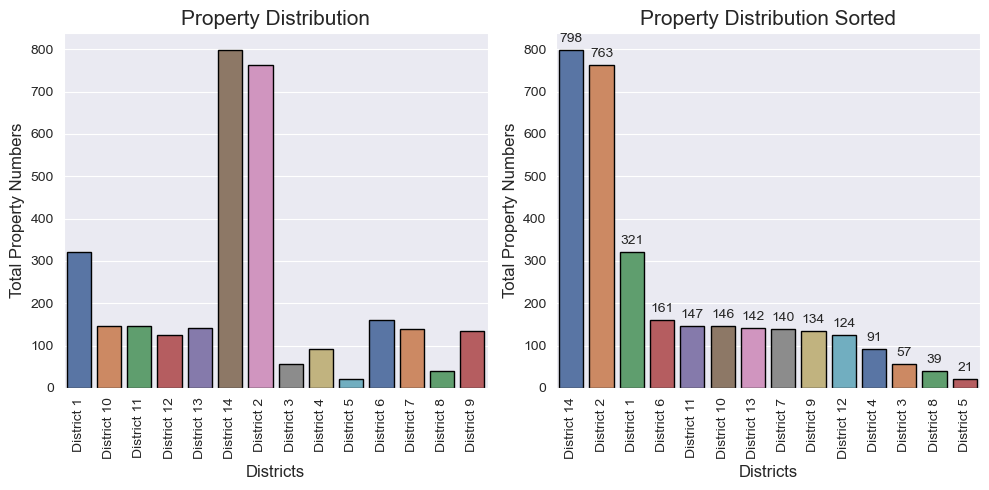

In [85]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

#1
ax[0] = sns.barplot(
        data=listings_neighbourhood_cleansed, 
        x='Districts', 
        y='property_numbers', 
        edgecolor='black', 
        palette='deep',
        ax=ax[0]
    )
ax[0].tick_params(axis='x', labelsize=10, rotation=90)
ax[0].tick_params(axis='y', labelsize=10)
ax[0].set_xlabel('Districts', fontsize=12)
ax[0].set_ylabel('Total Property Numbers', fontsize=12)
ax[0].set_title('Property Distribution', fontsize=15)


#2    
ax[1] = sns.barplot(
        data=listings_neighbourhood_cleansed_sorted, 
        x='Districts', 
        y='property_numbers', 
        edgecolor='black', 
        palette='deep',
        ax=ax[1]
    )
ax[1].tick_params(axis='x', labelsize=10, rotation=90)
ax[1].tick_params(axis='y', labelsize=10)
ax[1].set_xlabel('Districts', fontsize=12)
ax[1].set_ylabel('Total Property Numbers', fontsize=12)
ax[1].set_title('Property Distribution Sorted', fontsize=15)

# Annotating each bar with its height
for bar in ax[1].patches:
    ax[1].annotate('{}'.format(int(bar.get_height())), 
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                   ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')


plt.tight_layout()
plt.show()

#### 2. hosts distribution based on neighbourhood_cleansed (districts)

In [87]:
#Group by 'neighbourhood_cleansed', count the unique 'host_id' values, and reset the index to turn it into a DataFrame
listings_host_distribution = listingsLessColumns.groupby('neighbourhood_cleansed')['host_id'].nunique().reset_index()
listings_host_distribution.rename(columns = {'neighbourhood_cleansed': 'Districts', 'host_id': 'hosts_number'}, inplace = True)
listings_host_distribution_sorted = listings_neighbourhood_cleansed.sort_values('hosts_number', ascending = False)
listings_host_distribution_sorted

,Districts,hosts_number
6,District 2,531
5,District 14,431
0,District 1,225
10,District 6,151
4,District 13,115
2,District 11,113
11,District 7,113
13,District 9,110
1,District 10,91
8,District 4,89


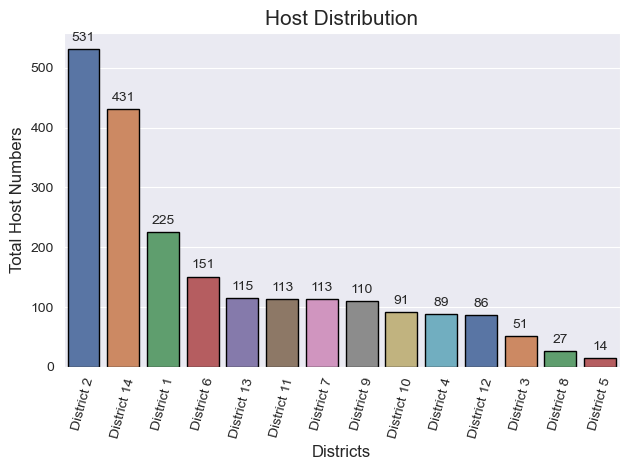

In [101]:
ax = sns.barplot(
        data=listings_host_distribution_sorted, 
        x='Districts', 
        y='hosts_number', 
        edgecolor='black', 
        palette='deep'
    )

ax.tick_params(axis='x', labelsize=10, rotation=75)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Districts', fontsize=12)
ax.set_ylabel('Total Host Numbers', fontsize=12)
ax.set_title('Host Distribution', fontsize=15)

for bar in ax.patches:
    ax.annotate(format(int(bar.get_height())), 
                (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                ha='center', va='center',
                size=10, xytext=(0, 8),
                textcoords='offset points')

plt.tight_layout()
plt.show()

#### 3. number of properties that each host has

In [116]:
# We group by 'host_id' and sum the 'calculated_host_listings_count' to get the total listings per host
listings_host_properties = listingsLessColumns.groupby('host_id')['calculated_host_listings_count'].sum()
listings_host_properties = listings_host_properties.reset_index()
listings_host_properties.rename(columns={'calculated_host_listings_count': 'total_listings_count'}, inplace=True)
# listings_host_properties.sort_values(by='total_listings_count', ascending=False, inplace=True)
listings_host_properties

,host_id,total_listings_count
0,43422,4
1,71423,1
2,146477,1
3,182325,4
4,249111,1
...,...,...
1822,555709935,1
1823,555823148,1
1824,559880673,1
1825,560539878,1


In [119]:
# Group by 'host_id' and sum the 'calculated_host_listings_count' to get the total listings per host
listings_host_properties = listingsLessColumns.groupby('host_id')['calculated_host_listings_count'].sum()
listings_host_properties = listings_host_properties.reset_index()
listings_host_properties.rename(columns={'calculated_host_listings_count': 'total_listings_count'}, inplace=True)

listings_host_properties.loc[listings_host_properties['total_listings_count'] < 5, "host_representative"] = "Most likely hosted by the owner"
listings_host_properties.loc[listings_host_properties['total_listings_count'] >= 5, "host_representative"] = "Most likely hosted by real-estate agents"

listings_host_properties_representative = pd.DataFrame(listings_host_properties["host_representative"].value_counts())
listings_host_properties_representative = listings_host_properties_representative.reset_index()
listings_host_properties_representative

,host_representative,count
0,Most likely hosted by the owner,1504
1,Most likely hosted by real-estate agents,323


#### 4. Superhosts

In [120]:
print("Number of superhosts:",listingsLessColumns[listingsLessColumns["host_is_superhost"]=="t"]["host_id"].nunique())
print("Number of properties from superhosts:",listingsLessColumns[listingsLessColumns["host_is_superhost"]=="t"]["id"].nunique())

Number of superhosts: 863
Number of properties from superhosts: 1138


#### 5. distribution of superhost and non-superhost properties based on neighbourhood_cleansed (districts)?

In [151]:
# Group by 'neighbourhood_cleansed', count the unique 'id' values for superhosts, and reset the index to turn it into a DataFrame
listings_superhost = listingsLessColumns[listingsLessColumns["host_is_superhost"] == 't'].groupby('neighbourhood_cleansed')['id'].nunique()
listings_superhost = listings_superhost.reset_index()
listings_superhost.rename(columns={'neighbourhood_cleansed': 'Districts', 'id': 'total_superhost_properties'}, inplace=True)
listings_superhost_sorted = listings_superhost.sort_values(by='total_superhost_properties', ascending=False)
listings_superhost_sorted

,Districts,total_superhost_properties
6,District 2,389
5,District 14,362
0,District 1,184
10,District 6,96
13,District 9,80
2,District 11,71
3,District 12,68
11,District 7,68
4,District 13,65
1,District 10,54


In [152]:
# Group by 'neighbourhood_cleansed', count the unique 'id' values for nonsuperhosts, and reset the index to turn it into a DataFrame
listings_nonsuperhost = listingsLessColumns[listingsLessColumns["host_is_superhost"] == 'f'].groupby('neighbourhood_cleansed')['id'].nunique()
listings_nonsuperhost = listings_nonsuperhost.reset_index()
listings_nonsuperhost.rename(columns={'neighbourhood_cleansed': 'Districts', 'id': 'total_nonsuperhost_properties'}, inplace=True)
listings_nonsuperhost_sorted = listings_nonsuperhost.sort_values(by='total_nonsuperhost_properties', ascending=False)
listings_nonsuperhost_sorted

,Districts,total_nonsuperhost_properties
5,District 14,485
6,District 2,484
0,District 1,156
1,District 10,94
4,District 13,82
2,District 11,81
10,District 6,75
11,District 7,73
3,District 12,57
13,District 9,57


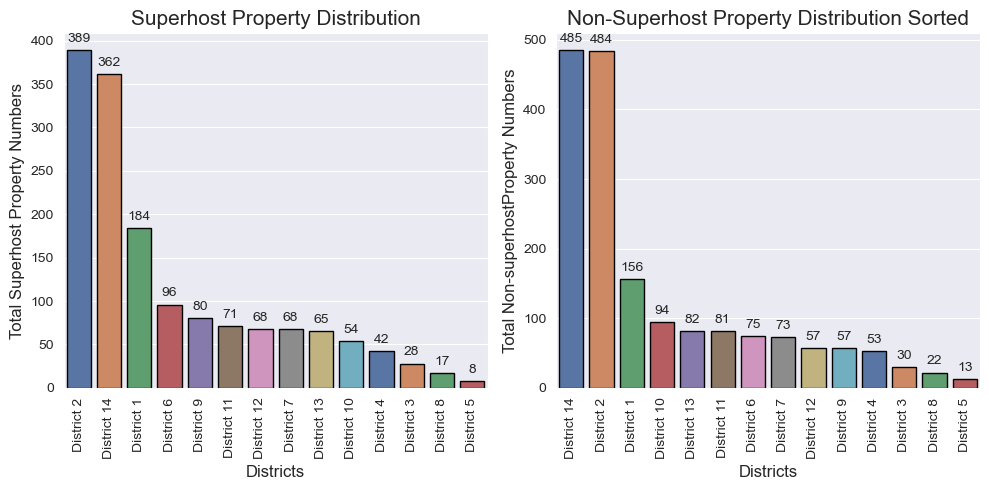

In [154]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

#1
ax[0] = sns.barplot(
        data=listings_superhost_sorted, 
        x='Districts', 
        y='total_superhost_properties', 
        edgecolor='black', 
        palette='deep',
        ax=ax[0]
    )

ax[0].tick_params(axis='x', labelsize=10, rotation=90)
ax[0].tick_params(axis='y', labelsize=10)
ax[0].set_xlabel('Districts', fontsize=12)
ax[0].set_ylabel('Total Superhost Property Numbers', fontsize=12)
ax[0].set_title('Superhost Property Distribution', fontsize=15)

# Annotating each bar with its height
for bar in ax[0].patches:
    ax[0].annotate('{}'.format(int(bar.get_height())), 
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                   ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')


#2    
ax[1] = sns.barplot(
        data=listings_nonsuperhost_sorted, 
        x='Districts', 
        y='total_nonsuperhost_properties', 
        edgecolor='black', 
        palette='deep',
        ax=ax[1]
    )
ax[1].tick_params(axis='x', labelsize=10, rotation=90)
ax[1].tick_params(axis='y', labelsize=10)
ax[1].set_xlabel('Districts', fontsize=12)
ax[1].set_ylabel('Total Non-superhostProperty Numbers', fontsize=12)
ax[1].set_title('Non-Superhost Property Distribution Sorted', fontsize=15)

# Annotating each bar with its height
for bar in ax[1].patches:
    ax[1].annotate('{}'.format(int(bar.get_height())), 
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                   ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')


plt.tight_layout()
plt.show()

#### 7. distribution of different types of rooms based on neighbourhood_cleansed (districts)

In [169]:
listings_roomtype = listingsLessColumns.groupby(["neighbourhood_cleansed", "room_type"])['id'].nunique()
listings_roomtype = listings_roomtype.reset_index()
listings_roomtype.rename(columns = {'neighbourhood_cleansed': 'Districts', 'id': 'total_number'}, inplace = True)
listings_roomtype

,Districts,room_type,total_number
0,District 1,Entire home/apt,284
1,District 1,Private room,33
2,District 1,Shared room,13
3,District 10,Entire home/apt,113
4,District 10,Private room,31
5,District 10,Shared room,6
6,District 11,Entire home/apt,134
7,District 11,Private room,15
8,District 11,Shared room,2
9,District 12,Entire home/apt,93


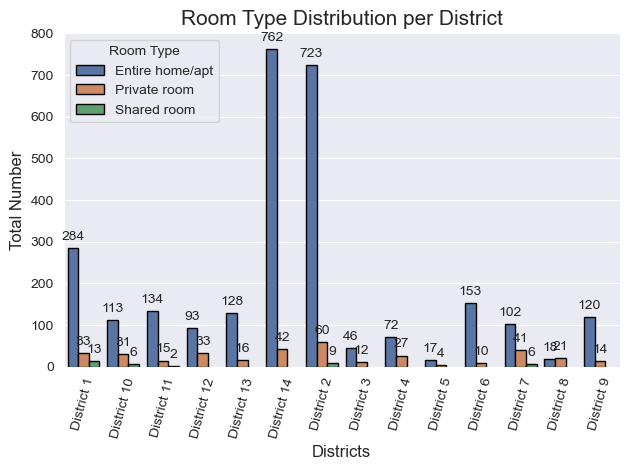

In [173]:
ax = sns.barplot(
    data=listings_roomtype, 
    x='Districts', 
    y='total_number', 
    hue='room_type',  # This will differentiate the bars by room type within each district
    edgecolor='black', 
    palette='deep'
)

ax.tick_params(axis='x', labelsize=10, rotation=75)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Districts', fontsize=12)
ax.set_ylabel('Total Number', fontsize=12)
ax.set_title('Room Type Distribution per District', fontsize=15)

for bar in ax.patches:
    height = bar.get_height()  # Get the height of the bar
    # Only proceed with annotation if height is not NaN
    if not np.isnan(height):
        ax.annotate(format(int(height)), 
                    (bar.get_x() + bar.get_width() / 2, height), 
                    ha='center', va='center',
                    size=10, xytext=(0, 8),
                    textcoords='offset points')

plt.tight_layout()
plt.legend(title='Room Type')
plt.show()

#### 8. How many new listings come into Airbnb in each year?

In [222]:
listingsLessColumns.head()

,id,host_id,host_since,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,neighbourhood_cleansed,latitude,longitude,...,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_since_datetime,first_review_datetime,last_review_datetime,Host_Year,Host_Year_Quarter,Host_Year_Month,Host_Year_Quarter1
0,61878.0,300211,11/26/10,f,2,3,t,District 2,32.81690,-96.82018,...,0,0,0.34,2010-11-26,2010-12-29,2023-12-30,2010,2010Q4,11,2010-Q4
1,776810.0,4096626,11/8/12,f,1,1,t,District 2,32.81462,-96.81586,...,0,0,0.21,2012-11-08,2012-11-16,2020-03-26,2012,2012Q4,11,2012-Q4
2,795703.0,4191322,11/19/12,t,2,4,t,District 14,32.80327,-96.80976,...,0,0,0.52,2012-11-19,2013-02-01,2022-09-25,2012,2012Q4,11,2012-Q4
3,826118.0,804559,7/11/11,f,2,3,f,District 12,32.98825,-96.78926,...,2,0,0.26,2011-07-11,2015-07-04,2024-01-31,2011,2011Q3,7,2011-Q3
4,826201.0,804559,7/11/11,f,2,3,f,District 12,32.98853,-96.78903,...,2,0,0.24,2011-07-11,2013-05-14,2024-01-15,2011,2011Q3,7,2011-Q3


In [223]:
listings_cumulative_year = listingsLessColumns.groupby("Host_Year")['id'].nunique()
listings_cumulative_year = listings_cumulative_year.reset_index()
# https://stackoverflow.com/questions/42691405/cumulative-sum-by-date-month
listings_cumulative_year.rename(columns={'id': 'lists_number'}, inplace=True)
listings_cumulative_year["cumsum_over_year"] = listings_cumulative_year["lists_number"].cumsum()
listings_cumulative_year

,Host_Year,lists_number,cumsum_over_year
0,2009,2,2
1,2010,7,9
2,2011,62,71
3,2012,57,128
4,2013,137,265
5,2014,262,527
6,2015,376,903
7,2016,526,1429
8,2017,330,1759
9,2018,271,2030


In [269]:
listings_cumulative_year['Compare'] = 'Before 2020'
listings_cumulative_year.loc[listings_cumulative_year['Host_Year'] > 2020, 'Compare'] = 'After 2020'
listings_cumulative_year.head()

,Host_Year,lists_number,cumsum_over_year,Compare
0,2009,2,2,Before 2020
1,2010,7,9,Before 2020
2,2011,62,71,Before 2020
3,2012,57,128,Before 2020
4,2013,137,265,Before 2020


In [272]:
#to connect 2020 - 2021 (comment out htis cell and see)
#To ensure 2020 is part of both groups, duplicate the 2020 data
data_with_overlap = listings_cumulative_year[listings_cumulative_year['Host_Year'] == 2020].copy()
data_with_overlap['Compare'] = 'After 2020'
listings_cumulative_year = pd.concat(
    [listings_cumulative_year, data_with_overlap],
    ignore_index=True
)

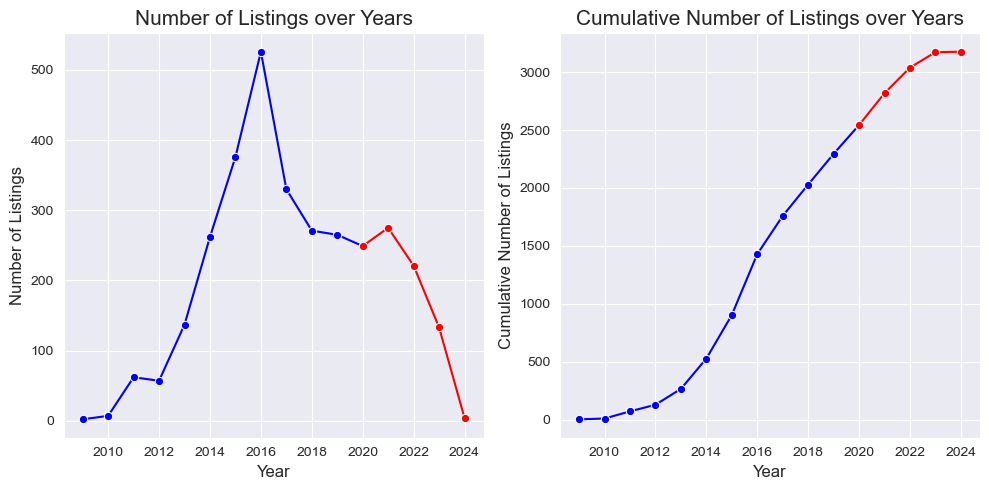

In [273]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# First subplot
sns.lineplot(
    x='Host_Year',
    y='lists_number',
    hue='Compare',
    data=listings_cumulative_year,
    palette=['blue', 'red'],  # Define the two colors
    legend=False,
    marker="o",
    ax=ax[0]
)

ax[0].set_xlabel('Year', fontsize=12)
ax[0].set_ylabel('Number of Listings', fontsize=12)
ax[0].set_title('Number of Listings over Years', fontsize=15)

# Second subplot
sns.lineplot(
    x='Host_Year',
    y='cumsum_over_year',
    hue='Compare',
    data=listings_cumulative_year,
    palette=['blue', 'red'],  # Define the two colors
    legend=False,
    marker="o",
    ax=ax[1]
)

ax[1].set_xlabel('Year', fontsize=12)
ax[1].set_ylabel('Cumulative Number of Listings', fontsize=12)
ax[1].set_title('Cumulative Number of Listings over Years', fontsize=15)

plt.tight_layout()
plt.show()

#### 9. How many new listing in different districs in different years?

In [279]:
listings_districts_year = listingsLessColumns.groupby(["neighbourhood_cleansed", "Host_Year"])["id"].nunique()
listings_districts_year = listings_districts_year.reset_index()
listings_districts_year = listings_districts_year.rename(columns={'neighbourhood_cleansed': 'Districts', 'id': 'total_number'})
listings_districts_year

,Districts,Host_Year,total_number
0,District 1,2009,2
1,District 1,2010,2
2,District 1,2011,19
3,District 1,2012,5
4,District 1,2013,13
...,...,...,...
169,District 9,2019,9
170,District 9,2020,2
171,District 9,2021,7
172,District 9,2022,10


In [280]:
listings_districts_year['Compare'] = 'Before 2020'
listings_districts_year.loc[listings_districts_year['Host_Year'] > 2020, 'Compare'] = 'After 2020'
listings_districts_year.head()

,Districts,Host_Year,total_number,Compare
0,District 1,2009,2,Before 2020
1,District 1,2010,2,Before 2020
2,District 1,2011,19,Before 2020
3,District 1,2012,5,Before 2020
4,District 1,2013,13,Before 2020


In [284]:
#to connect 2020 - 2021 (comment out htis cell and see)
#To ensure 2020 is part of both groups, duplicate the 2020 data
data_with_overlap = listings_districts_year[listings_districts_year['Host_Year'] == 2020].copy()
data_with_overlap['Compare'] = 'After 2020'
listings_districts_year = pd.concat(
    [listings_districts_year, data_with_overlap],
    ignore_index=True
)

,Districts,Host_Year,total_number,Compare,District_Number
0,District 1,2009,2,Before 2020,1
174,District 1,2020,35,After 2020,1
15,District 1,2024,2,After 2020,1
14,District 1,2023,23,After 2020,1
13,District 1,2022,53,After 2020,1
...,...,...,...,...,...
163,District 9,2013,11,Before 2020,9
162,District 9,2012,6,Before 2020,9
161,District 9,2011,1,Before 2020,9
173,District 9,2023,13,After 2020,9


/Users/jianjun/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/rw/twthjrr15xvc4mjhn1_xtnz00000gn/T/ipykernel_38772/2633607726.py:33: UserWarning: The figure layout has changed to tight
  ax.fig.tight_layout(pad=3)


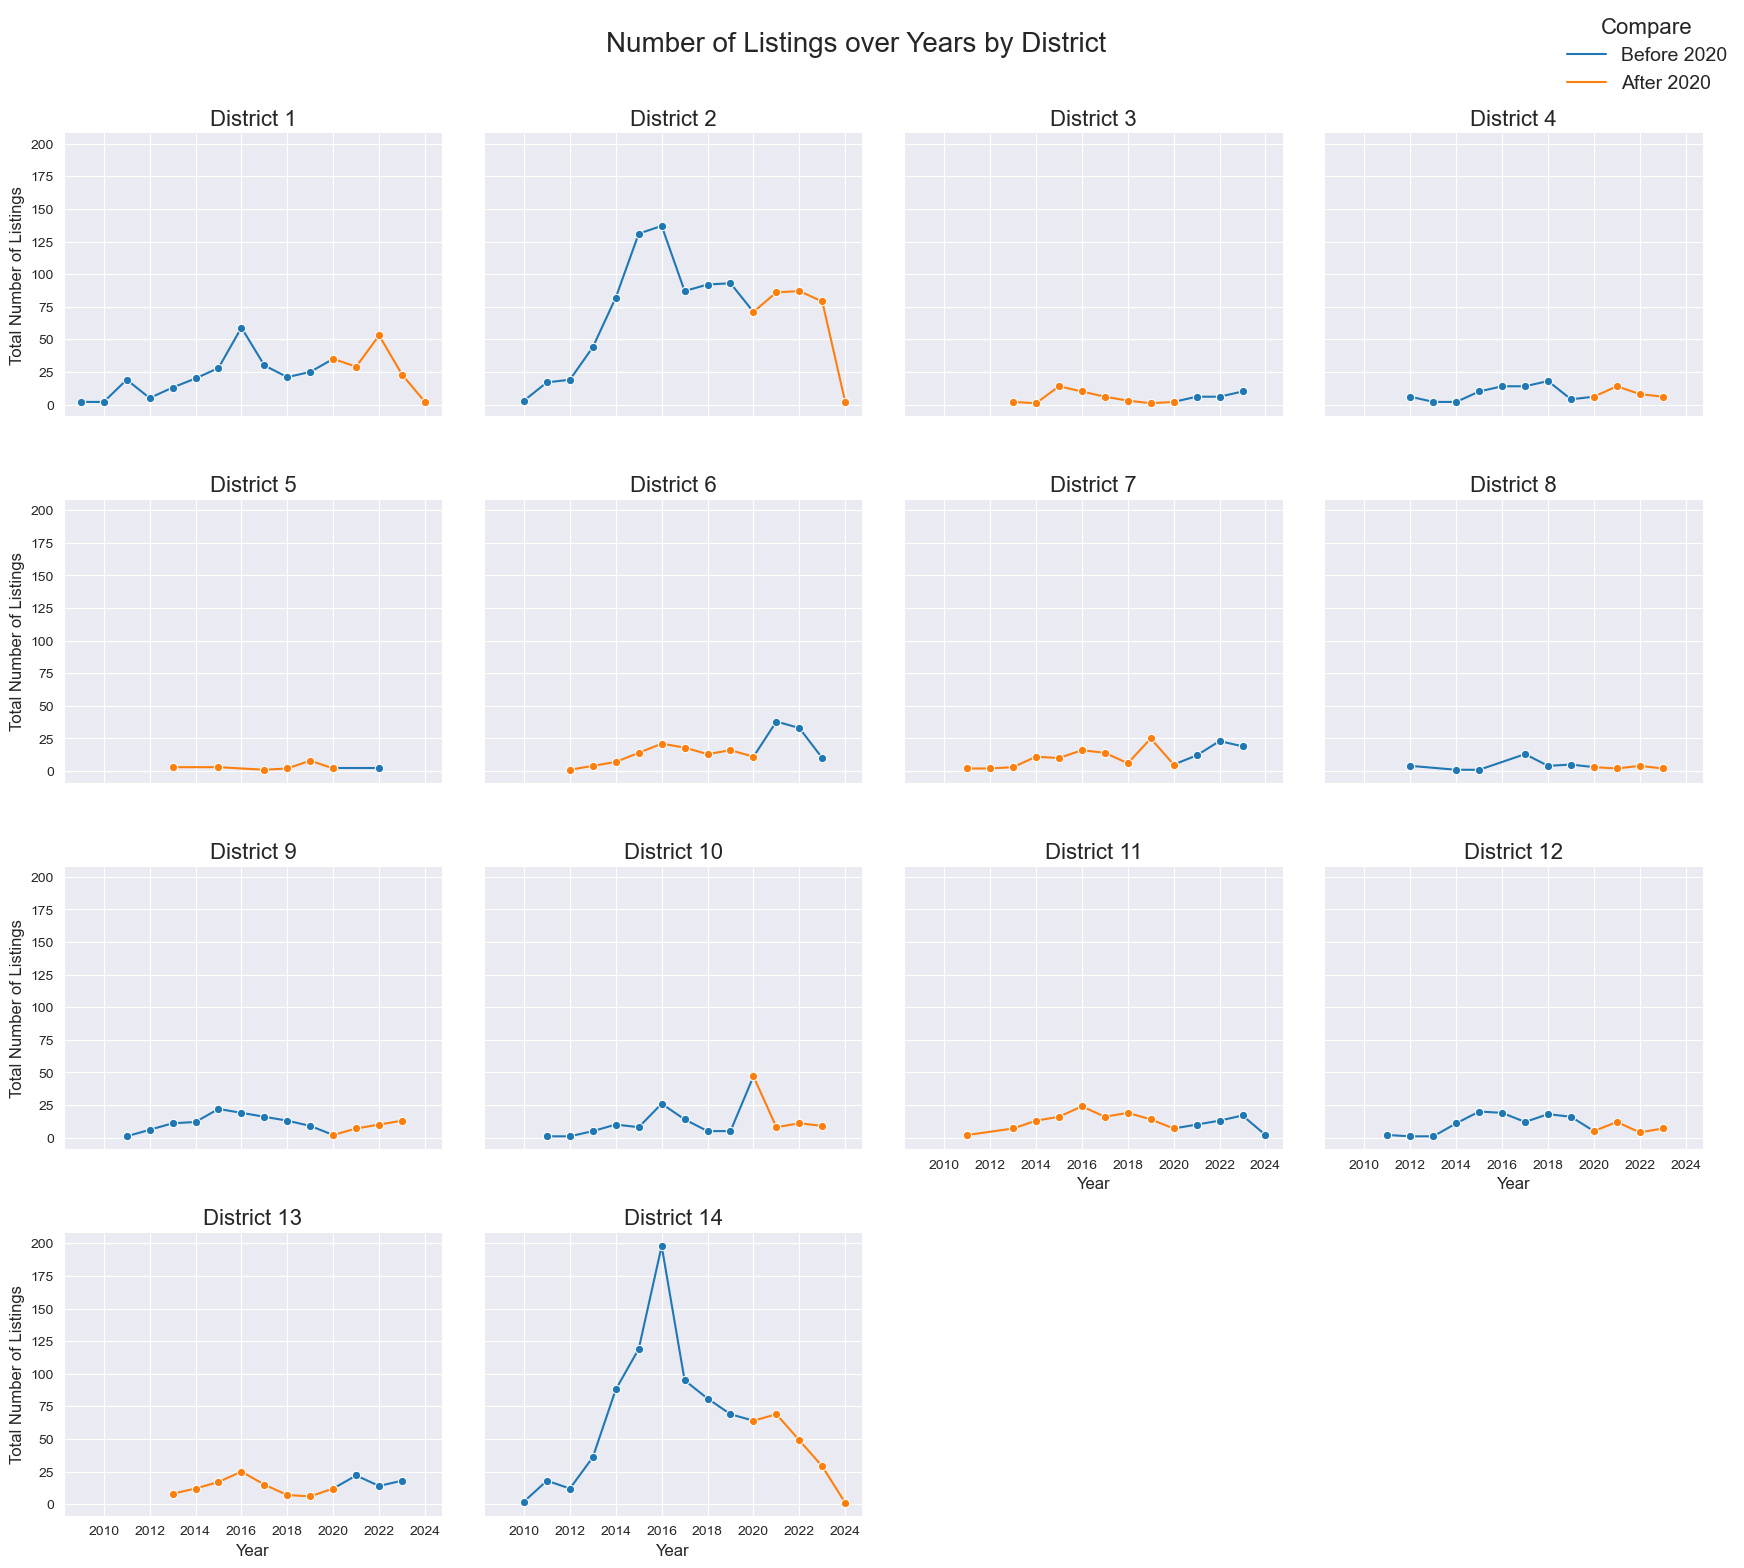

In [342]:
# sorted_listings = listings_districts_year.sort_values(by='Districts', ascending=True)

listings_districts_year['District_Number'] = (
    listings_districts_year['Districts']
    .str.extract('(\d+)')
    .astype(int)
)

sorted_listings = listings_districts_year.sort_values(by='District_Number', ascending=True)

ax = sns.FacetGrid(sorted_listings, col='Districts', col_wrap=4, height=4, aspect=1)
ax.map_dataframe(sns.lineplot, 
                 x='Host_Year', 
                 y='total_number', 
                 hue='Compare', 
                 marker="o")

# palette_colors = ['blue', 'red']

ax.add_legend(title='Compare', loc=1, fontsize=14)
ax.fig.legends[0].set_title('Compare')
plt.setp(ax.fig.legends[0].get_title(), fontsize='16')


ax.set_titles(col_template="{col_name}", size=16)
ax.set_xlabels('Year', fontsize=12)
ax.set_ylabels('Total Number of Listings', fontsize=12)

# Adding a general title for all plots
plt.subplots_adjust(top=0.9)
ax.fig.suptitle('Number of Listings over Years by District', fontsize=20)

ax.fig.tight_layout(pad=3)
plt.show()
#defaulty, only the last row will show up the xlabels

#### 10. Avg. price distribution over districts

In [370]:
listingsLessColumns["price"].describe()

count     4135.000000
mean       189.093833
std        576.236008
min         10.000000
25%         81.000000
50%        115.000000
75%        179.500000
max      10000.000000
Name: price, dtype: float64

In [371]:
# listingsLessColumns['price'] = listingsLessColumns['price'].str.replace('[$,]', '', regex=True).astype(float)

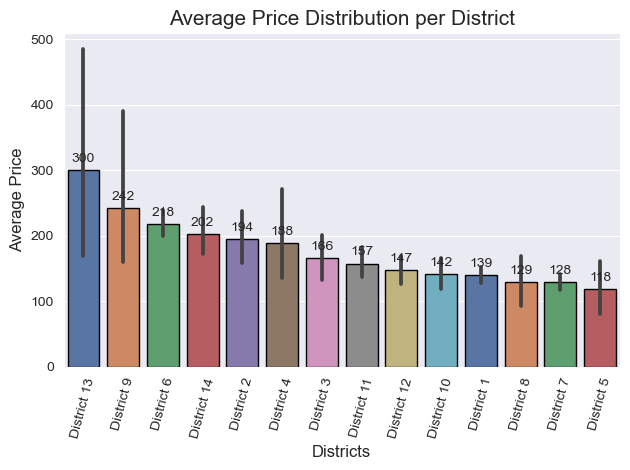

In [376]:
# Convert 'price' to numeric type if it's not already
# listingsLessColumns['price'] = pd.to_numeric(listingsLessColumns['price'])
ordering = listingsLessColumns.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False).index

ax = sns.barplot(
    data=listingsLessColumns, 
    y='price', 
    x='neighbourhood_cleansed', 
    edgecolor='black', 
    palette='deep',
    order=ordering
)

ax.tick_params(axis='x', labelsize=10, rotation=75)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Districts', fontsize=12)
ax.set_ylabel('Average Price', fontsize=12)
ax.set_title('Average Price Distribution per District', fontsize=15)

for bar in ax.patches:
    ax.annotate(format(int(bar.get_height())), 
                (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                ha='center', va='center',
                size=10, xytext=(0, 8),
                textcoords='offset points')

plt.tight_layout()
plt.show()

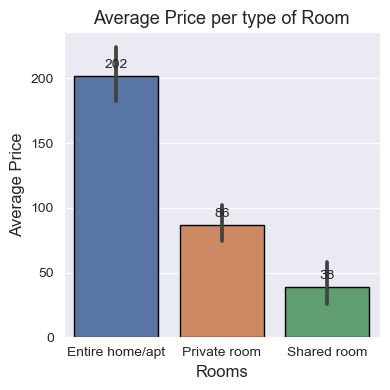

In [384]:
fig, ax = plt.subplots(figsize=(4, 4))

ordering = listingsLessColumns.groupby('room_type')['price'].mean().sort_values(ascending=False).index

ax = sns.barplot(
    data=listingsLessColumns, 
    y='price', 
    x='room_type', 
    edgecolor='black', 
    palette='deep',
    order=ordering
)

ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Rooms', fontsize=12)
ax.set_ylabel('Average Price', fontsize=12)
ax.set_title('Average Price per type of Room', fontsize=13)

for bar in ax.patches:
    ax.annotate(format(int(bar.get_height())), 
                (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                ha='center', va='center',
                size=10, xytext=(0, 8),
                textcoords='offset points')

plt.tight_layout()
plt.show()